# Sales Trend Analysis

## About the project
In this project we explore transactional data from UK-based online retail store. We will focus on the store's sales trends, sales demographics, and popular products. By conducting exploratory data analysis, we will identify patterns and outliers to supprot data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. 

Through visualizations and statistical analysis we will uncover key trends, such as:
- Who are the store's most valuable customers?
- What are the best-selling products?
- What the busiest sales hours, days of week and months?


## Dataset

The dataset we will be working with is the "Online Retail" dataset.
The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx` and it can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

1. Perform data cleaning by handling missing values, removing duplicates and any redundant or unnecessary columns.
2. Perform data visualization to gain insights into the dataset. 
3. Explore the top-selling products and countries based on the quantity sold.
4. Analyze the sales trends over time. Identify the busiest hours, days of the week and monthsin terms of sales.
5. Summarize findings from the exploratory data analysis.

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_excel('/Users/olexiyshulga/MY PROJECTS/online_retail/Online Retail.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
pd.set_option('display.max.rows', 500)

In [5]:
retail.shape

(541909, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 1. Cleaining and Pre-processing Dataset.

### 1.1.  Identifying and filling in missing values using cross-reference value

In [7]:
# Identifying missing values 

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
rt_null = retail[retail.isnull().any(axis=1)]

In [9]:
rt_null.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [10]:
# Filling in 'Description' of an Item

retail['Description'] = retail['Description'].fillna(retail.groupby(['StockCode'])['Description'].transform('first'))

In [11]:
# Filling in missing Customer ID number

retail['CustomerID'] = retail['CustomerID'].fillna(retail['CustomerID'].ffill()+ 1)

In [12]:
# All Customer IDs' are populated with unique valies 

retail['CustomerID'].isnull().sum()

0

In [13]:
# There are 112 items that have 'None' in 'Description' and unit price values are $0.00. So we will drop these Unknown items due thier irrelevance to the analysis. 
# Also some negative values of Quantity ordered identified (might be order cancaltions and returns)

retail.isnull().sum()

InvoiceNo        0
StockCode        0
Description    112
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [14]:
retail_1 = retail.dropna(subset = ['Description'])

In [15]:
# Remove other missing values

retail_1.dropna().reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541792,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541793,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541794,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541795,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541797 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541797 non-null  object        
 1   StockCode    541797 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541797 non-null  int64         
 4   InvoiceDate  541797 non-null  datetime64[ns]
 5   UnitPrice    541797 non-null  float64       
 6   CustomerID   541797 non-null  float64       
 7   Country      541797 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [17]:
# We identified 8 unique items with "amazon" in the item description and $o.oo price - potentially a discounted products.
# We will use this data for calculations of analysis. 
# These items can be mathced by StockCode

retail_1[retail_1['Description'] == 'amazon']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,14681.0,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,14681.0,United Kingdom
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,16951.0,United Kingdom
24290,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,17221.0,United Kingdom
311177,564229,82583,amazon,20,2011-08-24 10:20:00,0.0,13744.0,United Kingdom
314575,564645,82583,amazon,44,2011-08-26 13:38:00,0.0,15357.0,United Kingdom
488491,577829,85231G,amazon,1,2011-11-22 09:55:00,0.0,14912.0,United Kingdom
508834,579275,22176,amazon,1,2011-11-29 10:02:00,0.0,13468.0,United Kingdom


### 1.2. Finding and Deleting Duplicates

In [18]:
# 5268 duplicates found

retail_1[retail_1.duplicated() == True].count()


InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5268
Country        5268
dtype: int64

In [19]:
# Deleting duplicates

retail_1.drop_duplicates(keep = False, inplace = True)

/var/folders/pz/0y5z8tys2t59nzys4r02rdv80000gn/T/ipykernel_14776/1455630787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_1.drop_duplicates(keep = False, inplace = True)


In [20]:
retail_1.shape

(531650, 8)

In [21]:
retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 1.3. Data Preparation and Formatting

In [22]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531650 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531650 non-null  object        
 1   StockCode    531650 non-null  object        
 2   Description  531650 non-null  object        
 3   Quantity     531650 non-null  int64         
 4   InvoiceDate  531650 non-null  datetime64[ns]
 5   UnitPrice    531650 non-null  float64       
 6   CustomerID   531650 non-null  float64       
 7   Country      531650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [23]:
retail_1['TotalOrder'] = retail_1['Quantity'] * retail_1['UnitPrice']

/var/folders/pz/0y5z8tys2t59nzys4r02rdv80000gn/T/ipykernel_14776/2905837719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_1['TotalOrder'] = retail_1['Quantity'] * retail_1['UnitPrice']


In [24]:
# Filterting out negative values

retail_2 = retail_1[retail_1['TotalOrder'] >= 0]
retail_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522429 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522429 non-null  object        
 1   StockCode    522429 non-null  object        
 2   Description  522429 non-null  object        
 3   Quantity     522429 non-null  int64         
 4   InvoiceDate  522429 non-null  datetime64[ns]
 5   UnitPrice    522429 non-null  float64       
 6   CustomerID   522429 non-null  float64       
 7   Country      522429 non-null  object        
 8   TotalOrder   522429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 39.9+ MB


In [25]:
# 75% of items Unit Price is under 5.00 but max values are 13541. 

retail_2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalOrder
count,522429.000000,522429,522429.000000,522429.000000,522429.000000
mean,10.382314,2011-07-04 08:18:47.853660928,3.918716,15268.428881,20.326773
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000,-0.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13785.000000,3.900000
50%,4.000000,2011-07-19 13:57:00,2.080000,15144.000000,9.950000
75%,12.000000,2011-10-18 17:05:00,4.130000,16800.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,161.110826,NaN,36.177548,1738.900221,272.327688


In [26]:
# Finding and removing outliers - large transactions that are not part of the  customers orders
# DOTCOM POSTAGE / Manual / AMAZON FEE / POSTAGE

retail_2[retail_2['UnitPrice']  > 650].sort_values('UnitPrice',ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrder
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,17420.0,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,17517.0,United Kingdom,11062.06
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,17430.0,United Kingdom,4505.17
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,17449.0,United Kingdom,4287.63


In [27]:
# 1.Removing otlier 'Adjust bad debt'

retail_3 = retail_2.drop(retail_2[retail_2['Description']=='Adjust bad debt'].index)

In [28]:
# 2.Removing outlier 'Amazon fee'

retail_4 = retail_3.drop(retail_3[retail_3['Description']=='AMAZON FEE'].index)

In [29]:
# 3.Removing outlier 'Postage'

retail_5 = retail_4.drop(retail_4[retail_4['Description']=='POSTAGE'].index)

In [30]:
# 4.Removing outlier 'Manual'
retail_6 = retail_5.drop(retail_5[retail_5['Description']=='Manual'].index)

In [31]:
# 5. Removing outlier 'DOTCOM POSTAGE'
retail_7 = retail_6.drop(retail_6[retail_6['Description']=='DOTCOM POSTAGE'].index)

In [32]:
retail_c = retail_7 

In [33]:
# Converting 'CustomerId' values to int64

retail_c['CustomerID'] = retail_c['CustomerID'].astype(np.int64)

In [34]:
retail_c.shape

(520265, 9)

### 2. Exploratory Data Analysis 

### 2.1. The store's most valuable customers

In [35]:
customer_sorted = retail_c.groupby(['CustomerID'])['TotalOrder'].sum().reset_index().sort_values('TotalOrder', ascending = False).head(10)
customer_sorted

,CustomerID,TotalOrder
1817,14646,279138.02
4525,18102,259657.30
4015,17450,194230.79
3230,16446,168472.50
2026,14911,140222.94
61,12415,124564.53
1435,14156,117040.53
4062,17511,91062.38
0,12346,77183.60
2900,16029,72534.09


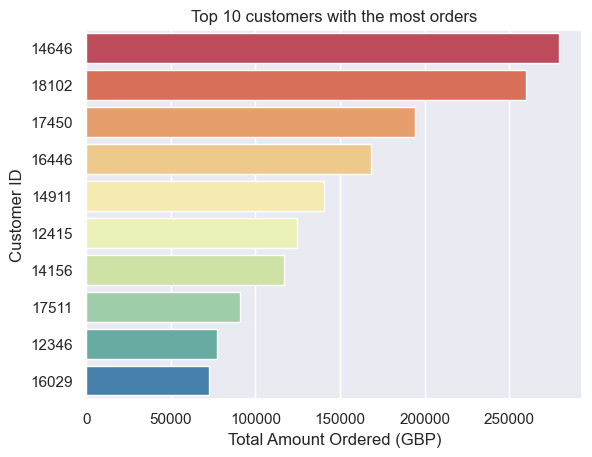

In [142]:
sns.set_theme(style = "darkgrid")
sns.barplot(y = 'CustomerID', x = 'TotalOrder',  data = customer_sorted, orient = 'h', palette = 'Spectral', order=customer_sorted.sort_values('TotalOrder',ascending = False).CustomerID)
plt.title('Top 10 customers with the most orders')
plt.xlabel('Total Amount Ordered (GBP)')
plt.ylabel('Customer ID')
plt.show()

In [37]:
# The most valuable customers by country

products = retail_c.groupby(['CustomerID','Country'])['TotalOrder'].sum().reset_index().sort_values('TotalOrder', ascending = False).head(10)
products

,CustomerID,Country,TotalOrder
1937,14646,Netherlands,279138.02
4671,18102,United Kingdom,259657.30
4158,17450,United Kingdom,194230.79
3362,16446,United Kingdom,168472.50
2149,14911,EIRE,140222.94
74,12415,Australia,124564.53
1550,14156,EIRE,117040.53
4205,17511,United Kingdom,91062.38
0,12346,United Kingdom,77183.60
3028,16029,United Kingdom,72534.09


In [52]:
# Customer Demographics - Number of customers by country

In [38]:
country_customer = retail_c.groupby(['Country'])['CustomerID'].count().reset_index().sort_values('CustomerID', ascending = False).head(10)
country_customer

,Country,CustomerID
36,United Kingdom,476559
14,Germany,8629
13,France,8072
10,EIRE,7867
31,Spain,2413
24,Netherlands,2326
3,Belgium,1935
33,Switzerland,1920
27,Portugal,1447
0,Australia,1182


### 2.2. Sales Distribution by Country 

In [39]:
# 38 countries 

retail_c['Country'].nunique()

38

In [162]:
# Sales Volumes by country

country_sorted = retail_c.groupby(['Country'])['TotalOrder'].sum().reset_index().sort_values('TotalOrder', ascending = False).head(5)
country_sorted.set_index('Country', inplace = True)
country_sorted

,TotalOrder
Country,
United Kingdom,8705178.664
Netherlands,283889.340
EIRE,275777.420
Germany,205192.410
France,184589.260


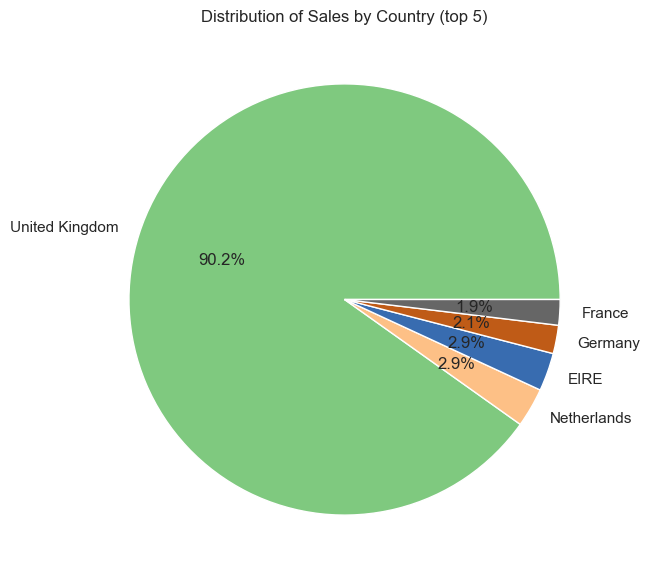

In [163]:
plt.figure(figsize=(7,7))
country_sorted['TotalOrder'].plot(kind = 'pie', autopct = '%1.1f%%', colormap = 'Accent', ylabel = '', title = 'Distribution of Sales by Country (top 5)')
plt.show()

In [ ]:
# UK is a top buyer by a lot amoung other countries. Almost 90% of purchases were made by customers from the UK.

### 2.3. Top 10 selling products

In [45]:
retail_c.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalOrder
count,520265.000000,520265,520265.000000,520265.000000,520265.000000
mean,10.396371,2011-07-04 09:29:44.798785280,3.281188,15273.644327,19.667749
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000,-0.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13799.000000,3.900000
50%,4.000000,2011-07-19 14:59:00,2.080000,15146.000000,9.920000
75%,12.000000,2011-10-18 17:05:00,4.130000,16804.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,161.389097,NaN,4.475033,1736.397353,270.526309


In [137]:
products_n = retail_c.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending = False).head(10)
products_n

,StockCode,Description,Quantity
2941,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2367,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3167,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54855
4350,85099B,JUMBO BAG RED RETROSPOT,48272
4363,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37566
1242,22197,POPCORN HOLDER,36737
440,21212,PACK OF 72 RETROSPOT CAKE CASES,36374
3286,84879,ASSORTED COLOUR BIRD ORNAMENT,36263
2253,23084,RABBIT NIGHT LIGHT,31026
1539,22492,MINI PAINT SET VINTAGE,26633


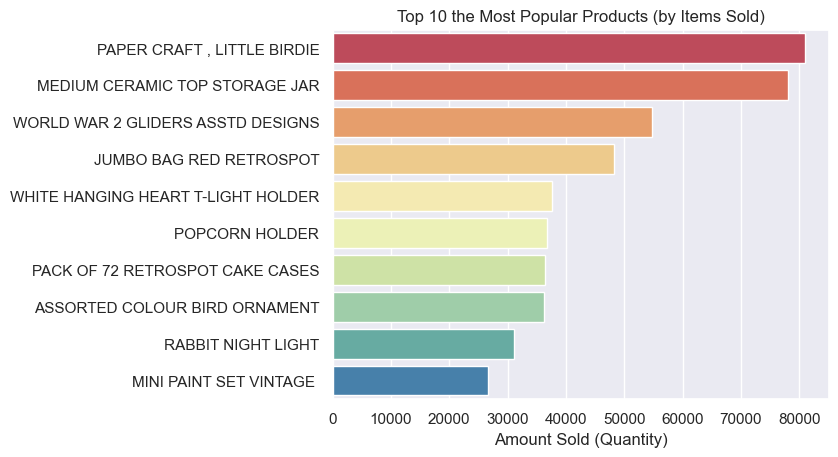

In [138]:
sns.set_theme(style = "darkgrid")
sns.barplot(y = 'Description', x = 'Quantity',  data = products_n, orient = 'h', palette = 'Spectral', order=products_n.sort_values('Quantity',ascending = False).Description)
plt.title('Top 10 the Most Popular Products (by Items Sold)')
plt.xlabel('Amount Sold (Quantity)')
plt.ylabel('')
plt.show()

In [48]:
product_pr = retail_c.groupby(['Description'])['TotalOrder'].sum().reset_index().sort_values('TotalOrder', ascending = False).head(10)
product_pr

,Description,TotalOrder
2902,REGENCY CAKESTAND 3 TIER,173828.34
2435,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3902,WHITE HANGING HEART T-LIGHT HOLDER,106183.62
2461,PARTY BUNTING,99386.13
1857,JUMBO BAG RED RETROSPOT,93979.57
2095,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
2790,RABBIT NIGHT LIGHT,66783.39
2429,PAPER CHAIN KIT 50'S CHRISTMAS,64804.79
242,ASSORTED COLOUR BIRD ORNAMENT,58760.31
770,CHILLI LIGHTS,54074.96


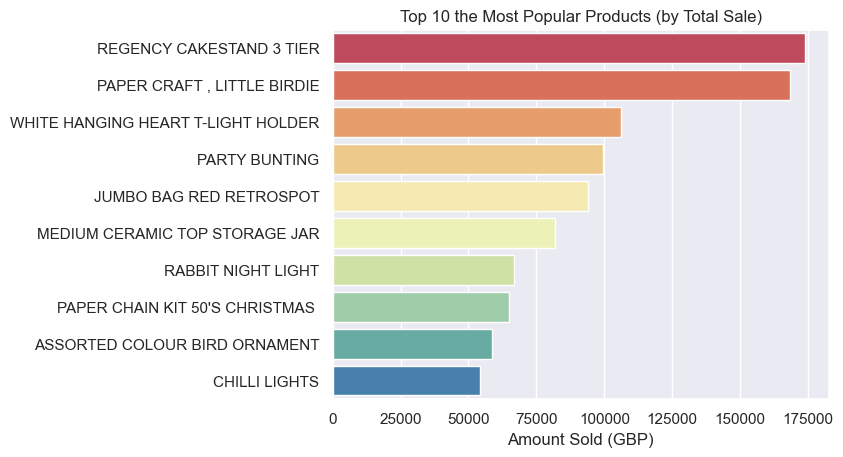

In [141]:

sns.barplot(y = 'Description', x = 'TotalOrder',  data = product_pr, orient = 'h', palette = 'Spectral', order=product_pr.sort_values('TotalOrder',ascending = False).Description)
plt.title('Top 10 the Most Popular Products (by Total Sale)')
plt.xlabel('Amount Sold (GBP)')
plt.ylabel('')
plt.show()

In [52]:
# The least popular items  - items that had not been sold.

products_m = retail_c.groupby(['StockCode','Description'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending = False).tail(570)
products_m[products_m['Quantity'] == 0].count()

StockCode      15
Description    15
Quantity       15
dtype: int64

### 2.4. Exploring Sales Trends (Time Series Analysis)

In [53]:
# First extracting datetime components: time of the day, day of hte week and month 
# And creating additional columns

retail_c['DayTime'] = retail_c['InvoiceDate'].dt.time
retail_c['Weekday'] = retail_c['InvoiceDate'].dt.day_name()
retail_c['Month'] = retail_c['InvoiceDate'].dt.month_name()

In [54]:
retail_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrder,DayTime,Weekday,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,08:26:00,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,08:26:00,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December


 ###  - Sales by Time of the day

In [58]:
# Extracting Hour from DayTime 

retail_c['DayTime'] = retail_c['DayTime'].astype(str)
retail_c[['Hour','Minute','Seconds']] = retail_c['DayTime'].str.split(':', expand = True)
retail_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrder,DayTime,Weekday,Month,Hour,Minute,Seconds
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,08:26:00,Wednesday,December,08,26,00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December,08,26,00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,08:26:00,Wednesday,December,08,26,00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December,08,26,00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,08:26:00,Wednesday,December,08,26,00


In [98]:
# Grouping by Hour 

time = retail_c.groupby(['Hour'])[['Quantity','TotalOrder']].sum().reset_index().sort_values('Hour', ascending = True)
time.head()

,Hour,Quantity,TotalOrder
0,06,1,4.250
1,07,15361,30519.210
2,08,158059,279629.840
3,09,513996,956253.971
4,10,769869,1401376.941


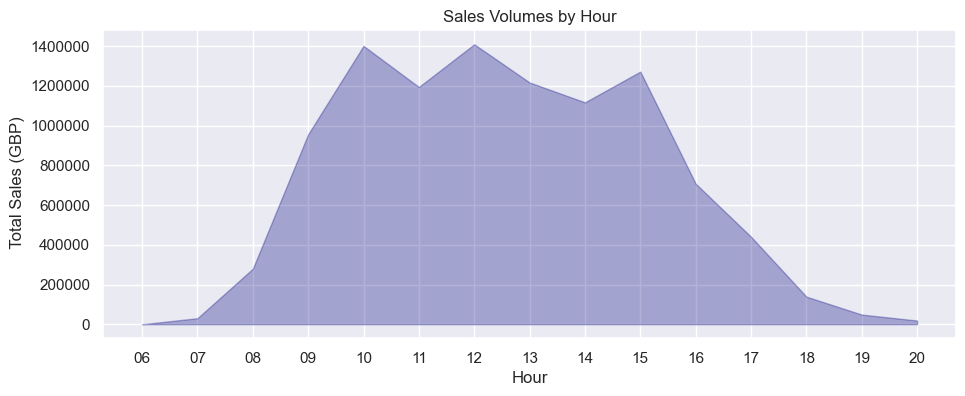

In [110]:
plt.figure(figsize=(11,4))
sns.set_theme(style = "darkgrid")
plt.fill_between(data = time, x ='Hour', y1 = 'TotalOrder', color ='navy', alpha =.3)
plt.title('Sales Volumes by Hour')
plt.xlabel('Hour')
plt.ylabel(' Total Sales (GBP)')
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
# The are 3  'peaks' of sales: increases from 8 to 10 (1 peak), peak at noon and the at 3 pm.

In [62]:
transact = retail_c.groupby(['Hour'])['InvoiceNo'].count().reset_index().sort_values('Hour', ascending = True)
transact.head()

,Hour,InvoiceNo
0,06,1
1,07,376
2,08,8747
3,09,33586
4,10,47312


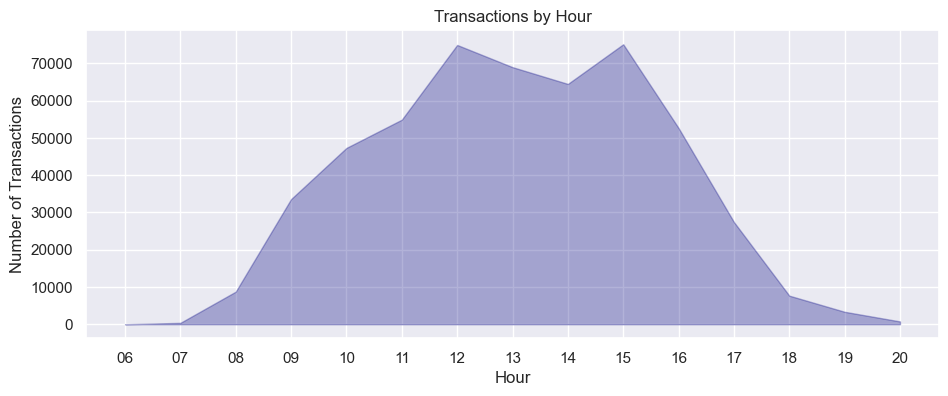

In [132]:
plt.figure(figsize=(11,4))
sns.set_theme(style = "darkgrid")
plt.fill_between(data = transact, x ='Hour', y1 = 'InvoiceNo', color ='navy', alpha =.3)
plt.title('Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# Highest amount of transactions occur at noon and 3pm, which confirms previous peaks of Total Sales.
# High Sales Volume at 9am can be explained by higher UnitPrice in orders.

### - Sales by Day of the Week

In [113]:
# Grouping by weekday
week1 = retail_c.groupby(['Weekday'])[['Quantity','TotalOrder']].sum().reset_index()

# Add row for Saturday sicne there were not transzctions on that day
sat = {'Weekday': 'Saturday','Quantity': 0.0, 'TotalOrder': 0.0} 
df = pd.DataFrame(sat, index=[0])
week = pd.concat([week1, df], ignore_index = True) 
week.reset_index() 

# Sorting from Monday to Sunday
week['Weekday'] = pd.Categorical(week['Weekday'], categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
week = week.sort_values('Weekday')
week

,Weekday,Quantity,TotalOrder
1,Monday,835493.0,1680991.331
4,Tuesday,1049827.0,2083572.041
5,Wednesday,984899.0,1779890.430
3,Thursday,1195500.0,2130046.550
0,Friday,883312.0,1765616.541
6,Saturday,0.0,0.000
2,Sunday,459837.0,792324.371


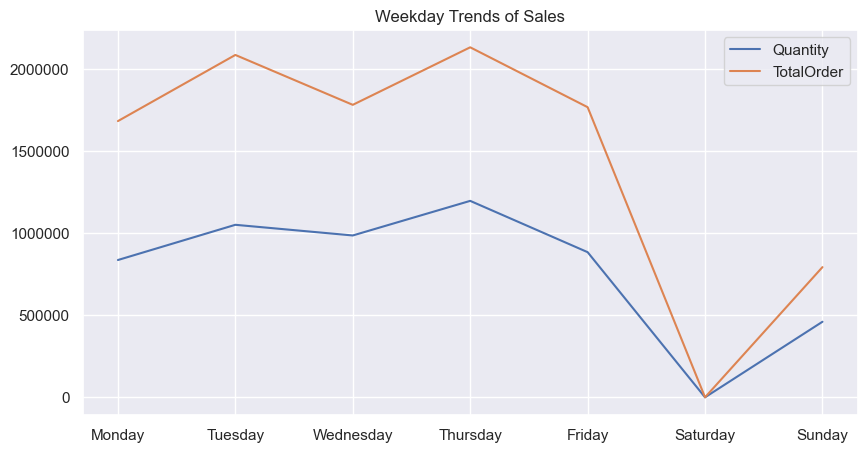

In [114]:
week.plot(x = 'Weekday', y = ['Quantity','TotalOrder'], figsize=(10, 5), grid=True)
plt.title('Weekday Trends of Sales')
plt.xlabel('')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
# Sales are rising from Sunday and peak on Tuesday and Thursday have the most sales. 
# Saturday has no data which indicates that the store is not working that day. 

### -  Sales by Month

In [115]:
# Grouping by month

month = retail_c.groupby(['Month'])[['Quantity','TotalOrder']].sum().reset_index()

In [116]:
# Sorting from January to December

month['Month'] = pd.Categorical(month['Month'], categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],ordered=True)
month = month.sort_values('Month')
month.head()

,Month,Quantity,TotalOrder
4,January,386326,669198.260
3,February,279367,507028.660
7,March,354176,689245.030
0,April,301120,515107.601
8,May,383823,739327.570


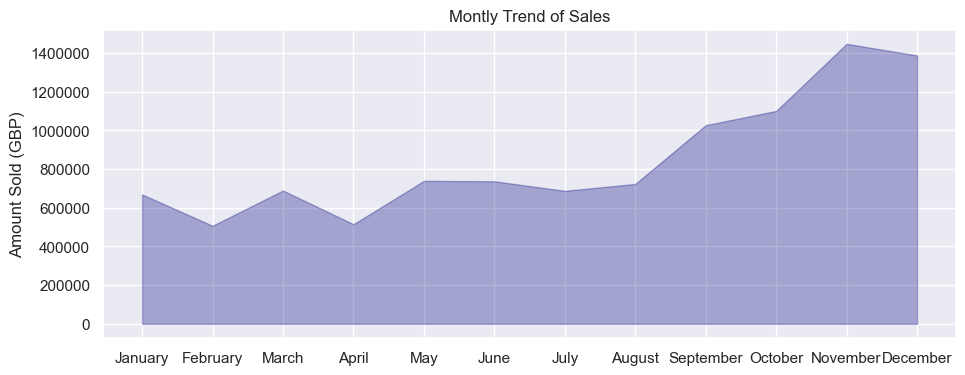

In [118]:
plt.figure(figsize=(11,4))
plt.fill_between(data = month, x ='Month', y1 = 'TotalOrder', color ='navy', alpha =.3)
plt.title('Montly Trend of Sales')
plt.ylabel('Amount Sold (GBP)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
# Significant incearse (over 1 million GBP)of sales occur beggining with September (people coming back from summer vacations) 
# Check inventory in July-August to anticipate customer demand 
# At the same time Feb and April are the lowest sales months

### -  Exploring four high demand months (Sept, Oct, Nov, Dec)

In [121]:
# Filter 4 high sales months (Set - Dec) with Total Order over 350 GBP to limit heatmap appearance.
# hsm = high sale momths
 
hsm = retail_c[retail_c['Month'].isin(['September','October','November','December']) & (retail_c['TotalOrder'] > 350)].sort_values('TotalOrder', ascending = False)
hsm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrder,DayTime,Weekday,Month,Hour,Minute,Seconds
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,09:15:00,Friday,December,09,15,00
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,11:05:00,Tuesday,September,11,05,00
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,12:11:00,Thursday,October,12,11,00
467804,576365,22086,PAPER CHAIN KIT 50'S CHRISTMAS,688,2011-11-14 17:55:00,6.95,15010,United Kingdom,4781.60,17:55:00,Monday,November,17,55,00
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195,United Kingdom,3861.00,12:20:00,Wednesday,December,12,20,00


In [180]:
# Creating dataset

m = pd.DataFrame(hsm.groupby(['Month','Description'])['TotalOrder'].sum()).sort_index(ascending=False)
m.head()

TotalOrder
Month     Description                                   
September WOODEN PICTURE FRAME WHITE FINISH       622.08
          WOOD BLACK BOARD ANT WHITE FINISH      1440.00
          WHITE HANGING HEART T-LIGHT HOLDER     1126.40
          VINTAGE UNION JACK MEMOBOARD            408.00
          VINTAGE CHRISTMAS CAKE FRILL            696.00

In [178]:
# Creating Pivot table
# High Demand Produts during High Sales Months

pivot_m = pd.pivot_table(m, values = 'TotalOrder', index = ['Description'], columns = ['Month'])
pivot_m1 = pivot_m.dropna()

# reordering columns (months) in a proper order
column_order = ['September','October','November','December']
pivot_m2 = pivot_m1.reindex(column_order, axis=1)

pivot_m2.head()

Month,September,October,November,December
Description,,,,
CHILLI LIGHTS,1544.40,1306.80,5206.94,4392.24
CHOCOLATE HOT WATER BOTTLE,408.00,408.00,408.00,1831.68
COLOUR GLASS. STAR T-LIGHT HOLDER,792.00,1716.00,552.72,528.00
CREAM HEART CARD HOLDER,748.44,584.64,498.96,5672.16
JUMBO BAG ALPHABET,358.00,716.00,2412.25,537.00


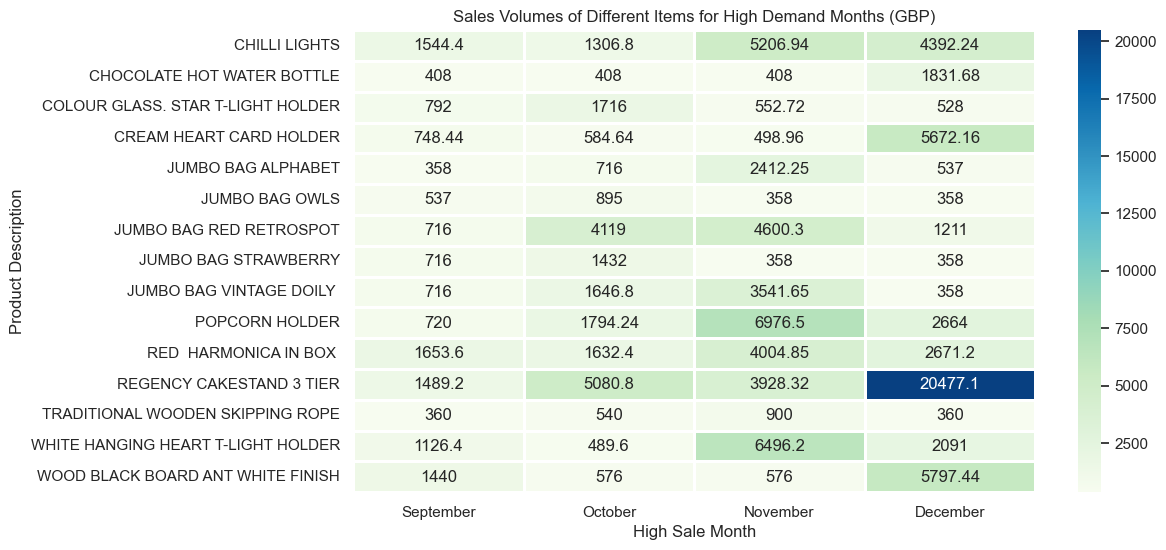

In [187]:
plt.figure(figsize =(11,6))

sns.heatmap(pivot_m2, cmap = 'GnBu', linewidths = 1, annot = True, fmt='g')
plt.title('Sales Volumes of Different Items for High Demand Months (GBP)')
plt.xlabel('High Sale Month')
plt.ylabel('Product Description')

plt.show()

### - Finding the most ordered items for high demand months

In [125]:
hsq = retail_c[retail_c['Month'].isin(['September','October','November','December']) & (retail_c['Quantity'] > 200)].sort_values('Quantity', ascending = False)
hsq.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrder,DayTime,Weekday,Month,Hour,Minute,Seconds
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,09:15:00,Friday,December,09,15,00
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0,15:57:00,Friday,November,15,57,00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.0,12:26:00,Thursday,October,12,26,00
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom,960.0,11:24:00,Wednesday,November,11,24,00
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,518.4,17:38:00,Thursday,December,17,38,00


In [182]:
n = pd.DataFrame(hsq.groupby(['Month','Description'])['Quantity'].sum()).sort_index(ascending=False)
n.head()

Quantity
Month     Description                                  
September found                                     600
          WORLD WAR 2 GLIDERS ASSTD DESIGNS         576
          WOODEN STAR CHRISTMAS SCANDINAVIAN        240
          WOODEN PICTURE FRAME WHITE FINISH         324
          WOODEN HEART CHRISTMAS SCANDINAVIAN       240

In [184]:
pivot_n = pd.pivot_table(n, values = 'Quantity', index = ['Description'], columns = ['Month'])
pivot_n1 = pivot_n.dropna()

# reordering columns (months) in a proper order
column_order = ['September','October','November','December']
pivot_n2 = pivot_n1.reindex(column_order, axis=1)

pivot_n2.head()

Month,September,October,November,December
Description,,,,
60 CAKE CASES DOLLY GIRL DESIGN,240.0,240.0,240.0,240.0
60 TEATIME FAIRY CAKE CASES,840.0,840.0,240.0,480.0
72 SWEETHEART FAIRY CAKE CASES,600.0,240.0,240.0,960.0
"ASSORTED FLOWER COLOUR ""LEIS""",1440.0,480.0,480.0,480.0
CREAM HEART CARD HOLDER,324.0,252.0,216.0,2304.0


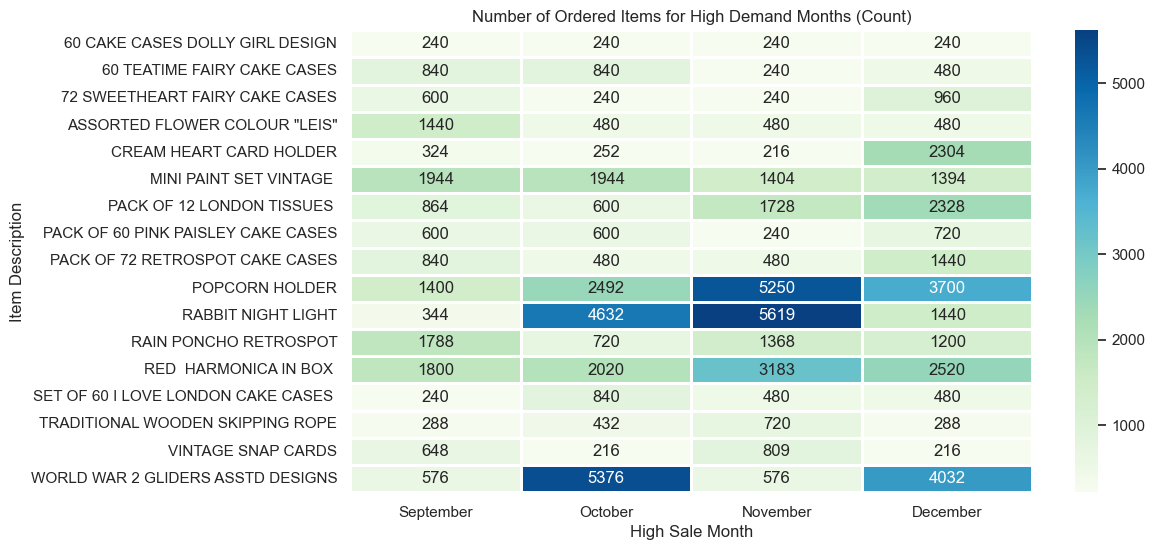

In [186]:
plt.figure(figsize =(11,6))

sns.heatmap(pivot_n2, cmap = 'GnBu', linewidths = 1, annot = True, fmt='g')
plt.title('Number of Ordered Items for High Demand Months (Count)')
plt.xlabel('High Sale Month')
plt.ylabel('Item Description')

plt.show()

## KEY FINDINGS AND RECOMMENDATIONS

1. **Customers** : 
    - the largest segment of customers is from UK (over 85% of total sales). Then go Netherelands, EIRE, France and Germany - combined they contribute around 10% of total sales.

    - the most valuable customer is from Netherlands followed by customers from UK. Among top 10 valuable customers are also customers from Australia and EIRE (Ireland).

    Recommendation: Focus marketing campaings on this target category. 
    
   
2. **Products**:
    - There are two the most sold products by sales volumes (GBP) and quanitiy sold: REGENCY CAKESTAND 3 TIER and PAPERCRAFT LITTLE BIRDIE.

    Recommendation: Ensure sufficient stock levels for these items and potentially provide discounts to customers to increase volume sales.

3. **Sales during Day and Week**:
    - Amount of transactions increases from 8 AM till noon and peak again 3pm. The same trend appears in Total Sales. At the same time sales are rising from Sunday and peak on Tuesday and Thursday. 
    
    Recommendation: Ensure sufficient operational capacity of the software and customer service support team during peak hours and high volume days.

4. **Seasonal Sales Dynamics**:
    - Sales increase from September to December, at the same time February and April are the lowest sales months.

    Recommendation: Check inventory stock levels for the top sold products (outlined above) in July-August to anticipate customer demand.
